In this tutorial you'll learn how to call parton distribution functions (PDFs), fragmentation functions (FFs), and their uncertainties using LHAPDF.

# Preliminaries

First you have to call the relevant libaries.

In [38]:
import lhapdf
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

The following isn't really necessary, but makes plots look bigger and more readable.

In [44]:
scale=0.8

plt.rcParams.update({
    'font.size':28,
    'figure.figsize': [scale*16,scale*9],
    'lines.linewidth': 3.5,
    'axes.linewidth': 2
    })

# Intro

Let's start simple. We'll create an array of evenly spaced points from $\epsilon$ to 1 with 1000 points. We'll choose $\epsilon = 10^{-5}$.

In [45]:
n_pts =1000     # number of points
eps = 10**(-5)  # epsilon
xax = np.linspace(eps,1, n_pts)  #makes array

Questions:

1. Why did we create a variable eps, n_pts instead of just putting 10**(-5) and 1000 into linspace? 

2. Why do we not go from 0 to 1?

See what xax is:

In [46]:
xax

array([1.00000000e-05, 1.01099099e-03, 2.01198198e-03, 3.01297297e-03,
       4.01396396e-03, 5.01495495e-03, 6.01594595e-03, 7.01693694e-03,
       8.01792793e-03, 9.01891892e-03, 1.00199099e-02, 1.10209009e-02,
       1.20218919e-02, 1.30228829e-02, 1.40238739e-02, 1.50248649e-02,
       1.60258559e-02, 1.70268468e-02, 1.80278378e-02, 1.90288288e-02,
       2.00298198e-02, 2.10308108e-02, 2.20318018e-02, 2.30327928e-02,
       2.40337838e-02, 2.50347748e-02, 2.60357658e-02, 2.70367568e-02,
       2.80377477e-02, 2.90387387e-02, 3.00397297e-02, 3.10407207e-02,
       3.20417117e-02, 3.30427027e-02, 3.40436937e-02, 3.50446847e-02,
       3.60456757e-02, 3.70466667e-02, 3.80476577e-02, 3.90486486e-02,
       4.00496396e-02, 4.10506306e-02, 4.20516216e-02, 4.30526126e-02,
       4.40536036e-02, 4.50545946e-02, 4.60555856e-02, 4.70565766e-02,
       4.80575676e-02, 4.90585586e-02, 5.00595495e-02, 5.10605405e-02,
       5.20615315e-02, 5.30625225e-02, 5.40635135e-02, 5.50645045e-02,
      

Now, let's a create new array:

In [47]:
y = 3*xax +1

We can plot y vs. xax:

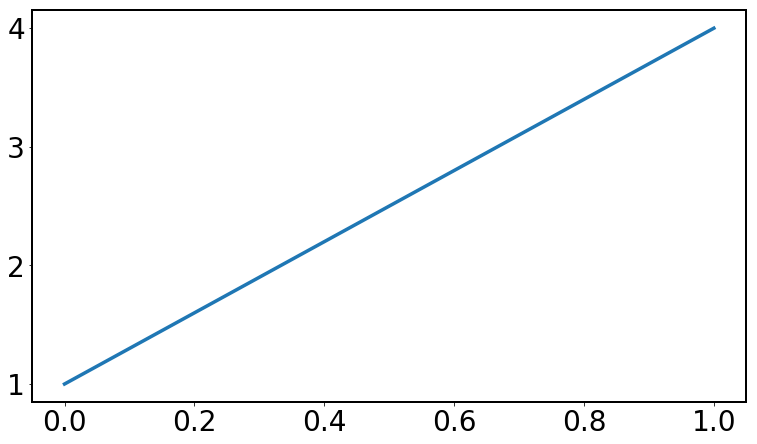

In [48]:
plt.plot(xax, y)

Exercises:
1. Add axes labels, title, legend
2. Save as figure

# Using LHAPDF

Now, let's call PDF functions. Let's use CT18 NNLO.

In [49]:
# This is calls the PDF set CT18 NNLO
pset_CT18NNLO = lhapdf.getPDFSet("CT18NNLO") 

# This makes PDFs
pdfs_CT18NNLO = pset_CT18NNLO.mkPDFs()

The .info file tells us about the particulars of this set.

_ _ _ 

SetDesc: 'CT18NNLO, 3-loop PDF evolution with HOPPET and HOPPET alphas_s running solution.

This set has 59 member PDFs. mem=0 --> central value; mem=1-58 --> eigenvector sets 90%'

Authors: T.-J. Hou, K. Xie, J. Gao, S. Dulat, M. Guzzi, T. J. Hobbs, J. Huston, P. Nadolsky, J. Pumplin, C. Schmidt, I. Sitiwaldi, D. Stump, C.-P. Yuan

Reference: arXiv:1908.11394 (temporary)

Format: lhagrid1

DataVersion:     1

NumMembers:    59

SetIndex: 00000

Flavors: [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 21]

OrderQCD:     2

FlavorScheme: variable

NumFlavors: 5

ErrorType: hessian

ErrorConfLevel: 90

XMin:   1.000000e-09
XMax:   1.000000E+00
QMin:   1.295000E+00
QMax:   1.000000E+05

MZ:  91.1870
MUp:   0.0010
MDown:   0.0010
MStrange:   0.2000
MCharm:   1.3000
MBottom:   4.7500
MTop: 172.0000

AlphaS_MZ:  0.118000
AlphaS_OrderQCD:     2
AlphaS_Type: ipol


AlphaS_Qs: [ 1.29500E+00, 1.29875E+00, 1.46461E+00, 1.65924E+00, 1.89067E+00, 2.16749E+00, 2.50067E+00, 2.90430E+00, 3.39664E+00, 4.00145E+00, 4.75000E+00, 5.76715E+00, 7.07072E+00, 8.75819E+00, 1.09657E+01, 1.38856E+01, 1.77929E+01, 2.30855E+01, 3.03471E+01, 4.04448E+01, 5.46864E+01, 7.50724E+01, 1.04712E+02, 1.48517E+02, 2.14380E+02, 3.15212E+02, 4.72537E+02, 7.22946E+02, 1.12995E+03, 1.80616E+03, 2.95593E+03, 4.95886E+03, 8.53814E+03, 1.51079E+04, 2.75107E+04, 5.16275E+04, 1.00000E+05]


AlphaS_Vals: [ 3.78712E-01, 3.77954E-01, 3.53434E-01, 3.30194E-01, 3.09188E-01, 2.90098E-01, 2.72663E-01, 2.56673E-01, 2.41952E-01, 2.28356E-01, 2.15760E-01, 2.04638E-01, 1.93923E-01, 1.83856E-01, 1.74388E-01, 1.65473E-01, 1.57071E-01, 1.49144E-01, 1.41660E-01, 1.34588E-01, 1.27902E-01, 1.21575E-01, 1.15586E-01, 1.09913E-01, 1.04537E-01, 9.94398E-02, 9.46049E-02, 9.00171E-02, 8.56622E-02, 8.15271E-02, 7.75995E-02, 7.38679E-02, 7.03216E-02, 6.69506E-02, 6.37456E-02, 6.06978E-02, 5.77990E-02]

There are 59 member sets. The $i =0$ is the central value, the rest are used for uncertainty calculations.

In [78]:
pset_CT18NNLO.size

59

Now, let's call a PDF. Specifically, let's find $x d (x, Q) $ at $x=0.1$ and $Q = 10 \ \ GeV$ for the central value.

In [51]:
pdfs_CT18NNLO[0].xfxQ(1, 0.1, 10) 

0.40675770829275265

You can get infromation about LHAPDF funcions here:
    
https://lhapdf.hepforge.org/modules.html

Now, we see the gluon PDF we can use a flavor index of 0 or 21.

In [52]:
pdfs_CT18NNLO[0].xfxQ(0, 0.1, 10) 

1.1628485735760896

In [53]:
pdfs_CT18NNLO[0].xfxQ(21, 0.1, 10) 

1.1628485735760896

NOTE: There's also a xfxQ2 which takes $Q^2$ as input instead of $Q$. Either is acceptable but be sure you're aware of which one it is you're using!

### Plotting all flavors on one graph

Now, let's plot all the flavors at $Q=10 \ \ GeV$ on one graph.

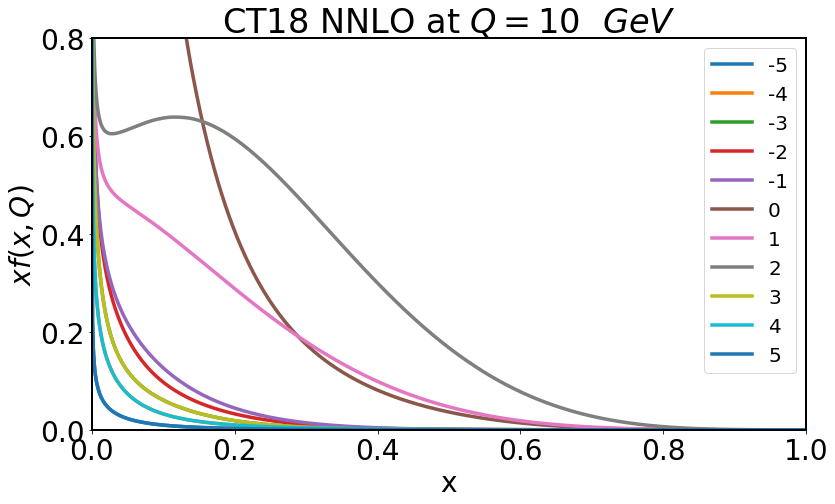

In [54]:
Q = 10  # Specify Q

# We're going to iterate from [-5, -4,...+5] 

for n_flavor in range(-5, 6):
    # This creates the xf(x,Q^2) using list comprehension
    xPDF = [pdfs_CT18NNLO[0].xfxQ(n_flavor, x, Q) for x in xax]
    
    # This turns list to numpy array. Not needed here, but useful in general.
    xPDF = np.array(xPDF)
    
    # Plots the PDF and labels for legend.
    plt.plot(xax, xPDF, label="%s"%(n_flavor) )   

# To make the graph pretty:    
plt.ylabel('$xf(x,Q)$')
plt.xlabel('x')
plt.ylim(0,0.8)
plt.xlim(0,1)
plt.title('CT18 NNLO at $Q = 10 \ \ GeV$')
plt.legend(fontsize=20)

Exercises:
1. Using dictionaries, make the legend give flavor name (e.g, 'down' for n_flav = 1) 
2. Get $xd_V$, $xu_V$ and $S$
3. Learn to call the function for $\alpha_S(Q^2)$ and plot it.

# Fragmentation Functions and Uncertainties

Calling the fragmentation function is pretty much identical to calling the PDFs. Here get from the JAM19 set. We wish to create the below image taken from [here](https://arxiv.org/pdf/1905.03788.pdf).

file:///home/chris/Pictures/FF.jpg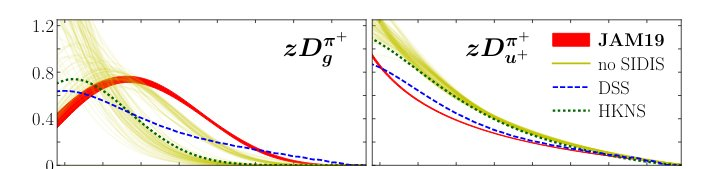

In [55]:
pset_JAM19FF_pion_nlo = lhapdf.getPDFSet("JAM19FF_pion_nlo") # ErrorType: hessian
pdfs_JAM19FF_pion_nlo= pset_JAM19FF_pion_nlo.mkPDFs()

Let's get the central values for $zD_g^{\pi^+}$ and $zD_{u^+}^{\pi^+}$ at $Q_0 = 1.14 \ \ GeV $. 

In [79]:
Q = 1.14 # change Q value to refelx paper

#Create gluon FF
FF_g_centr = np.array([pdfs_JAM19FF_pion_nlo[0].xfxQ(0, x, Q) 
                       for x in xax])

# Create u plus FF
FF_u_plus_centr = np.array([pdfs_JAM19FF_pion_nlo[0].xfxQ(2, x, Q) 
                            + pdfs_JAM19FF_pion_nlo[0].xfxQ(-2, x, Q) 
                            for x in xax])

Text(0.5,1,'Pion Fragmentation Function - Central')

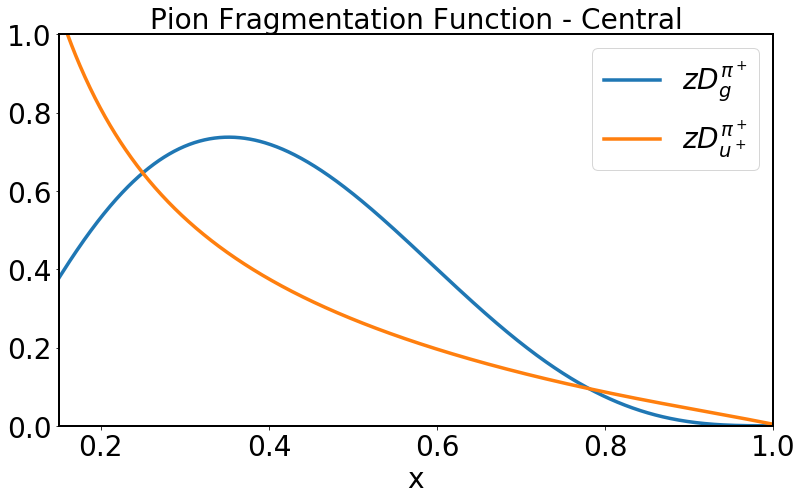

In [75]:
plt.plot(xax, FF_g_centr, label = '$zD_g^{\pi^+}$')
plt.plot(xax, FF_u_plus_centr, label = '$zD_{u^+}^{\pi^+}$')

plt.legend()
plt.ylim(0,1)
plt.xlim(0.15,1)
plt.xlabel('x')
plt.title('Pion Fragmentation Function - Central', size= 28)

The following function will help us get the uncertainty for $zD_{u^+}^{\pi^+}$.

In [86]:
def PDF_uncertainty_band_plus (q_in, n_pts, PDF_set, qrk_num, cl):

    """
    Input: q, no. of points, PDF set, quark number, confidence level,

    Output: 3 arrays of central, lower error, upper error for PDF from x=0 to 1 
    with  n_pts (Just quark PDF, not valence PDF)

    """
    #q = q_in

    #Set up arrays 

    xdV_central = np.zeros(n_pts)
    xdV_upper   = np.zeros(n_pts)
    xdV_lower   = np.zeros(n_pts)
    
    #Make PDFs
    pdfs = PDF_set.mkPDFs()
    
    # Now we make the central, lower and upper uncertainty for each point
    # in the x axis
    
    for i in range(n_pts):
        
        # Set up x point and initiate PDF at x point for each PDF member set 
        x = (1./n_pts)*i
        
        xdV_All = np.zeros(PDF_set.size)

        # Go through each member set and get PDF at x point
        for imem in range(1,PDF_set.size):
            xdV_All[imem] = pdfs[imem].xfxQ(qrk_num, x, q_in) + pdfs[imem].xfxQ(-qrk_num, x, q_in)

        # Call uncertainty method, insert cl in confidence level
        unc = PDF_set.uncertainty(xdV_All, cl)
        
        # Get central, lower and upper value
        xdV_central[i] = unc.central
        xdV_upper[i]  = unc.central + unc.errplus_pdf
        xdV_lower[i]  = unc.central - unc.errminus_pdf
        
    return xdV_central, xdV_lower, xdV_upper

In [90]:
FF_u_centr, FF_u_lower, F_u_upper = PDF_uncertainty_band_plus (Q, n_pts, 
                                                               pset_JAM19FF_pion_nlo , 
                                                               2, 68)

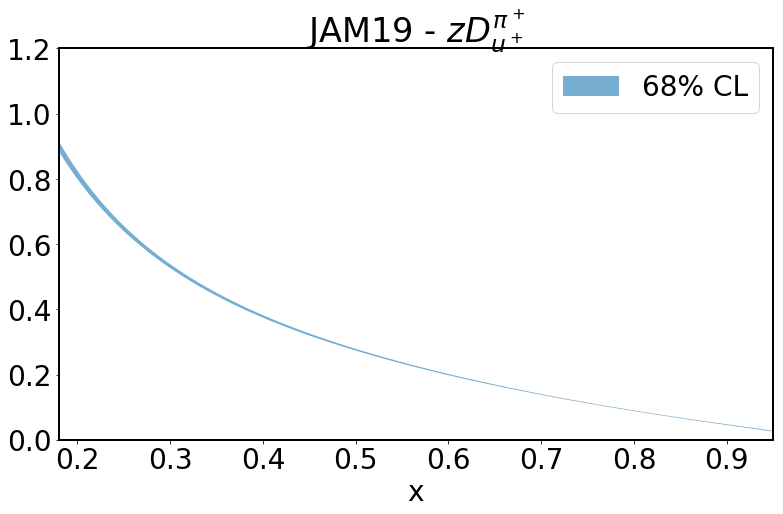

In [91]:
plt.fill_between(xax, FF_u_lower, F_u_upper, 
                      alpha = 0.6, label= "68% CL") 
plt.title('JAM19 - $zD_{u^+}^{\pi^+}$')
plt.xlim(0.18,0.95)
plt.ylim(0,1.2)
plt.xlabel('x')
plt.legend()

Exercise:
1. Get $zD_g^{\pi^+}$ this way.

# Integrate

Here's will check the normalization of the down valence PDF.

In [121]:
def down_val(x):
    return (pdfs_CT18NNLO[0].xfxQ(1, x, Q) - pdfs_CT18NNLO[0].xfxQ(-1, x, Q))/x

We'll use Gaussian quadrature from the integrate module from scipy.

In [125]:
integrate.quad(lambda x: down_val(x), 0,1 )

/home/chris/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


(0.9999703003591381, 0.0001985839585253446)

Exercises:
1. Check the normalization of $xu_V$ for $Q^2 = 1 - 10^5  \ \ GeV$
2. Check the normalization of $\sum_i \int_0^1 dx  xf_i (x, Q^2) = 1 $